In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [3]:
cohort = "experimental"             # cohort name

# data_method = "data_gamma"        # method name
data_method = "eval_single"         # method name
eval_method = "eval_nominal"        # method name

scene = "mid_gate"                  # scene name

courses = [                         # course names
    # "hover",
    # "line",
    "robustness_track",
    ]   

roster = [
    "Maverick",                     # sifu_testbed
    ]


In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Using existing observation data...

Output()

======================================================================
Cohort : experimental
Network: histNet
====================================================================== 
----------------------------------------------------------------------
Student: Maverick | Epochs: 120   | Data Size: 295.0/295.0
 Time: 0h 0m 12s   | Train: 7.2798 | Test: 7.4164
 ======================================================================

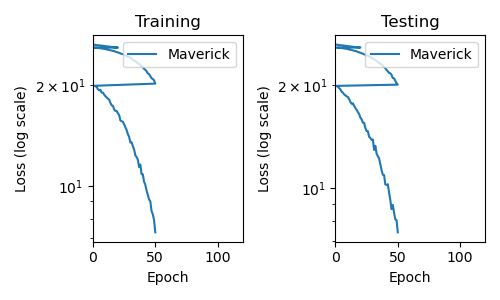

In [5]:
# Second Stage Training
tp.train_roster(cohort,roster,"histNet",50,regen=False)


pl.plot_losses(cohort,roster,"histNet")


In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster)
    pl.plot_deployments(cohort,course,roster,plot_show=True)